# K-Means Clustering:

In [49]:
import dataset_utils
import numpy as np
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import os
from dataset_utils import get_random_songs
# len(labels[3])

X = np.load(dataset_utils.copy_base+'DATASET_toy_X.npy')
y = np.load(dataset_utils.copy_base+'DATASET_toy_Y.npy')
print(X.shape,y.shape)
data = X

(60, 124044) (60,)


In [51]:
n_samples, n_features = data.shape
n_ragas = len(np.unique(y))
labels = y

sample_size = 300

In [52]:
def bench_k_means(estimator, name, data):
  estimator.fit(data)
  init = estimator.inertia_
  ari = metrics.adjusted_rand_score(labels, estimator.labels_)
  ami = metrics.adjusted_mutual_info_score(labels, estimator.labels_)
  fmi = metrics.fowlkes_mallows_score(labels, estimator.labels_)
  print(f"{name} \t {init} \t {ari} \t {ami} \t {fmi}")

In [53]:
estim_1 = KMeans(init='k-means++', n_clusters=n_ragas, n_init=10)
bench_k_means(estim_1, 'kmeans++', data)

kmeans++ 	 678480.2471372302 	 -0.017782441815332874 	 0.001777018227349981 	 0.45086258914391747


In [54]:
estim_2 = KMeans(init='random', n_clusters=n_ragas, n_init=10)
bench_k_means(estim_2, 'random', data)

random 	 687029.4769073623 	 0.006410942254443378 	 0.007979483656122523 	 0.34162372457797496


In [55]:
pca = PCA(n_components=n_ragas).fit(data)
pca_kmeans = KMeans(init=pca.components_, n_clusters=n_ragas, n_init=1)
bench_k_means(pca_kmeans, 'PCA_based', data)

PCA_based 	 679794.0537577308 	 -0.021678966789667842 	 -0.019680968487538638 	 0.3904990143926878


## Visualisation

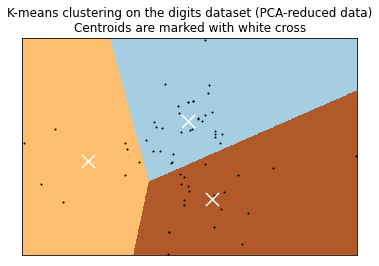

In [56]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_ragas, n_init=10)
kmeans.fit(reduced_data)
h = 0.2
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()